<a href="https://colab.research.google.com/github/aitorvv96/road_to_AI/blob/main/Tensorflow/Zero_to_Mastery/01_regression_with_neural_networks-my_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro Regression with Neuronal Networks in TensorFlow


In [1]:
# import tf
import tensorflow as tf
print(tf.__version__)

2.11.0


## Creating data to view and fit

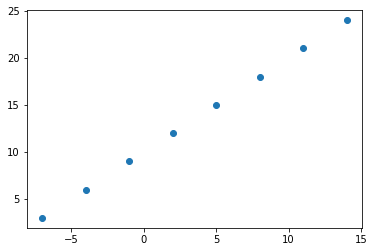

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]) # independent variable

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]) # dependent variable

# visualize it
plt.scatter(x, y)

In [3]:
# relationship between our variables
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom','bathroom', 'garage'])
house_price = tf.constant([979700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([979700], dtype=int32)>)

In [5]:
# check shape of our inputs and outputs
input_shape = x.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# check shapes of one input and output
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
# Turn our numpy arrays into tensor with dtype float32
x = tf.cast(tf.constant(x), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

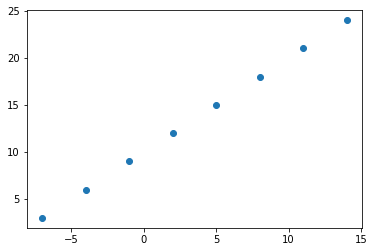

In [9]:
plt.scatter(x, y)

## Steps in modelling with TF

1. **Creating a model **- define input and output layers, as well as hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (in other words, the function that tells our model how wrong it is) and optimizer (how to improve patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between x and y (features and labels)
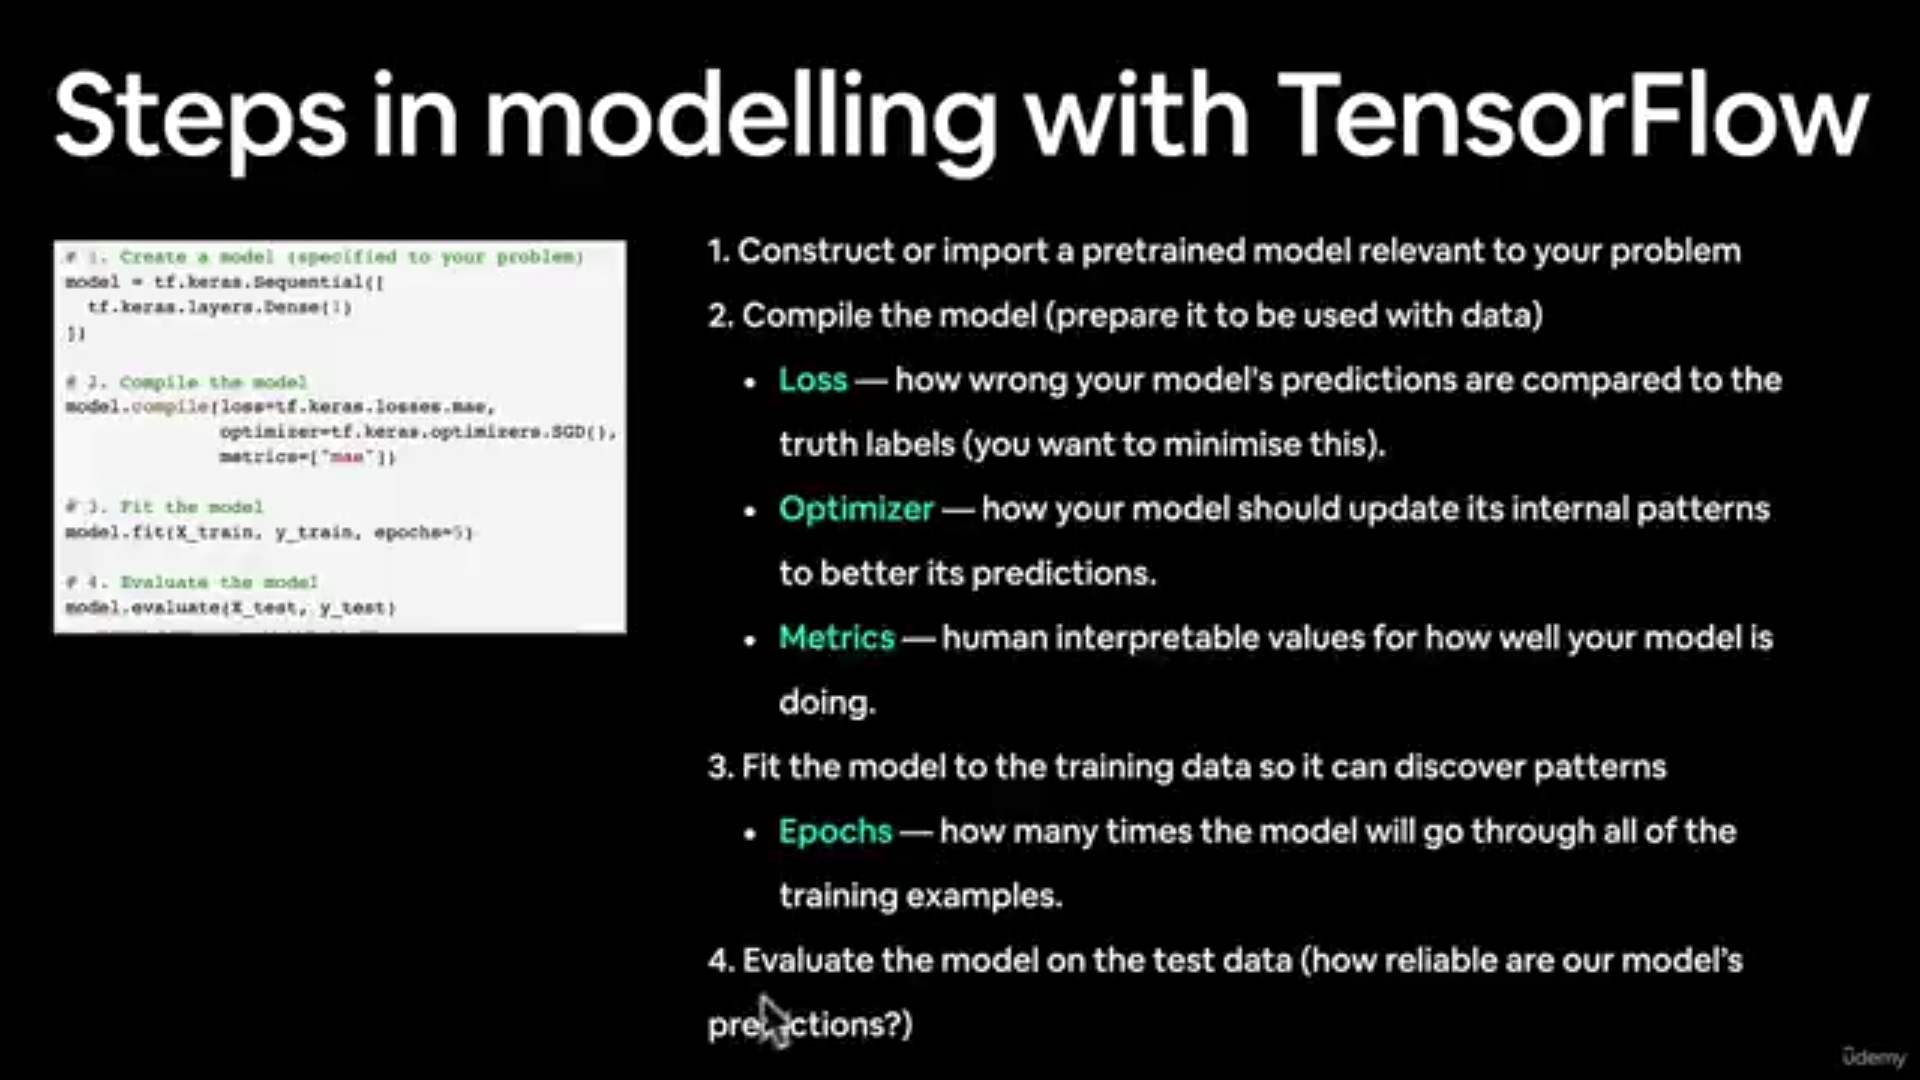

In [10]:
# set random seed
tf.random.set_seed(42)

# 1. create a model using the sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))


# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae']
              )

# 3. Fit the model
model.fit(tf.expand_dims(x, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 843ms/step - loss: 7.8253 - mae: 7.8253
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 7.6928 - mae: 7.6928
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 7.5603 - mae: 7.5603
Epoch 4/5
1/1 [==============================] - 0s 342ms/step - loss: 7.4775 - mae: 7.4775
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 7.4719 - mae: 7.4719


In [11]:
# check out x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# try and make a prediction with our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 158ms/step


array([[29.39264]], dtype=float32)

In [13]:
y_pred + 11

array([[40.39264]], dtype=float32)

## improving our model

we can improve a model by altering the steps we took to create a model
1. *Create a model* - we might add more layers, increase the number of hidden units (neurons) within each of the hidden liyers, change the activation function of each laer
2. *Compiling a model* - we might change the optimization function or the *learning rate* of the optimization function
3. *Fitting a model* - we might fit a model for more *epochs* (leave it training for longer) or on more data (give the model more examples to learn from)

In [14]:
# Let's rebuild our model

# 1. create a model using the sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))


# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae']
              )

# 3. Fit the model (longer training)
model.fit(tf.expand_dims(x, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 507ms/step - loss: 18.6948 - mae: 18.6948
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 18.4136 - mae: 18.4136
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 18.1323 - mae: 18.1323
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 17.8511 - mae: 17.8511
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 17.5698 - mae: 17.5698
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 17.2886 - mae: 17.2886
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 17.0073 - mae: 17.0073
Epoch 8/100
1/1 [==============================] - 0s 34ms/step - loss: 16.7261 - mae: 16.7261
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 16.4448 - mae: 16.4448
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 16.1636 - mae: 16.1636
Epoch 11/100
1/1 [==============================

In [15]:
# remind about our data
x, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# let's see if our model prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 104ms/step


array([[29.247639]], dtype=float32)

In [17]:
# Let's make new improvements in our model

# 1. Model creation
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

# 2. model compiling
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# 3. model fit
model.fit(tf.expand_dims(x, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 849ms/step - loss: 13.8645 - mae: 13.8645
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 13.2743 - mae: 13.2743
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.6837 - mae: 12.6837
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 12.0872 - mae: 12.0872
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 11.4801 - mae: 11.4801
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 10.8558 - mae: 10.8558
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 10.2115 - mae: 10.2115
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 9.5649 - mae: 9.5649
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 8.8834 - mae: 8.8834
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 8.1691 - mae: 8.1691
Epoch 11/100
1/1 [==============================] - 0s

In [18]:
# test new model
model.predict([17.0])

1/1 [==============================] - 0s 134ms/step


array([[31.63578]], dtype=float32)

In [19]:
# Let's make more improvements in our model

# 1. Model creation
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation = 'relu'))
model.add(tf.keras.layers.Dense(100, activation = 'relu'))
model.add(tf.keras.layers.Dense(100, activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

# 2. model compiling
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# 3. model fit
model.fit(tf.expand_dims(x, axis = -1), y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 13.4110 - mae: 13.4110
Epoch 2/500
1/1 [==============================] - 0s 18ms/step - loss: 12.9896 - mae: 12.9896
Epoch 3/500
1/1 [==============================] - 0s 20ms/step - loss: 12.5762 - mae: 12.5762
Epoch 4/500
1/1 [==============================] - 0s 30ms/step - loss: 12.1516 - mae: 12.1516
Epoch 5/500
1/1 [==============================] - 0s 21ms/step - loss: 11.6993 - mae: 11.6993
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 11.1778 - mae: 11.1778
Epoch 7/500
1/1 [==============================] - 0s 35ms/step - loss: 10.5667 - mae: 10.5667
Epoch 8/500
1/1 [==============================] - 0s 23ms/step - loss: 9.8226 - mae: 9.8226
Epoch 9/500
1/1 [==============================] - 0s 16ms/step - loss: 8.8983 - mae: 8.8983
Epoch 10/500
1/1 [==============================] - 0s 15ms/step - loss: 7.7406 - mae: 7.7406
Epoch 11/500
1/1 [==============================] - 0s 13

In [20]:
# test new model
model.predict([17.0])

1/1 [==============================] - 0s 129ms/step


array([[23.680218]], dtype=float32)

In [21]:
# test adams optimizer with a simpler model

# 1. model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50))
model.add(tf.keras.layers.Dense(1))

# 2. compiling model
model.compile(
    loss = 'mae',
    optimizer = tf.keras.optimizers.Adam(lr = 0.01),
    metrics = ['mae']
)

# 3. model fit
model.fit(tf.expand_dims(x, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.5161 - mae: 13.5161
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.4480 - mae: 13.4480
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 13.3800 - mae: 13.3800
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3121 - mae: 13.3121
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2443 - mae: 13.2443
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1765 - mae: 13.1765
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1088 - mae: 13.1088
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0411 - mae: 13.0411
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9735 - mae: 12.9735
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9059 - mae: 12.9059
Epoch 11/100
1/1 [==============================] - 

In [22]:
# test new model
model.predict([17.0])

1/1 [==============================] - 0s 113ms/step


array([[31.053997]], dtype=float32)

## evaluating a model

in practice, a typical workflow you'll go through when building neural networks is:

```
build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> fit it -> evaluate it -> ...
```

3 words to memorize:
*visualize, visualize, visualize*

It's a good idea to visualize: 
* the data
* the model itself
* the model performance
* the model predictions

In [23]:
# make a bigger dataset
x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
# make labels for the dataset
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

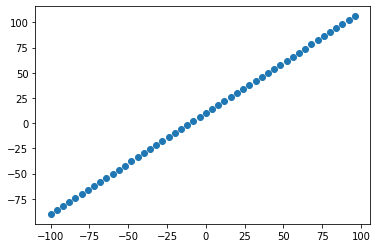

In [25]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(x, y)

### The 3 sets...

* training set: to traing - around 70-80% data available
* validation set: model get tuned on this data, around 10-15% data available
* test set: to evaluate - around 10-15% data available


In [26]:
# check length data available
len(x)

50

In [27]:
# split data into train and test sets
x_train = x[:40] # first 40 training samples
y_train = y[:40] # first 40 training samples

x_test = x[40:] # last 10 test samples
y_test = y[40:] # last 10 test samples

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

# visualize data

let's visualize data in training and test sets

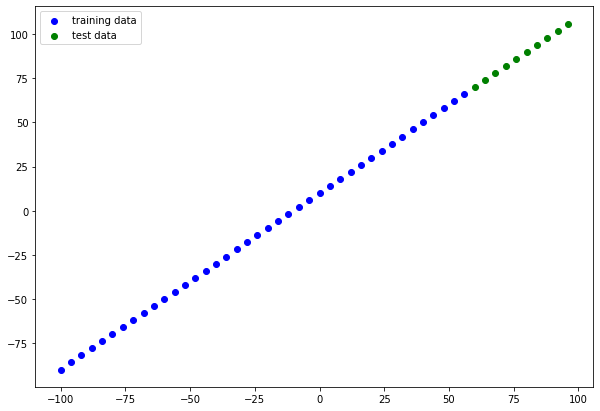

In [28]:
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(x_train, y_train, c = 'blue', label = 'training data')
# plot test data in green
plt.scatter(x_test, y_test, c = 'green', label = 'test data')
# legend
plt.legend(); 

In [29]:
# let's build a new neural network

# 1. Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compilation
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# 3. FIT
# model.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 100)

# visualize model before to fit it

In [31]:
# we will receive an error here

#model.summary()

In [32]:
# let's create a model that builds automatically bu defining the input_shape argument
tf.random.set_seed(42)

# 1. Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = 'input_layer'), # input_shape is 1 because we want to predict 1 value using just another 1 value
    tf.keras.layers.Dense(1, name = 'output_layer')
], name = 'my_model')

# 2. compilation
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    metrics = ['mae']
)

In [33]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* total params = all parameters in the model
* trainable parameters = parameters (patterns) the model can update as it trains
* non-trainable parameters = these parameters aren't updated during training; typical when you bring in already learn model from other topics by transfer learning

In [34]:
# fit our model with our training data
model.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 100, verbose = 0)

In [35]:
# here we was testing changing hidden layers and looking and params changes on the model summary

model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [36]:
# for visualize
from tensorflow.keras.utils import plot_model

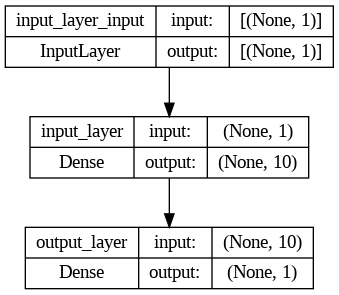

In [37]:
# visualizing structure
plot_model(model = model, show_shapes = True)

### visualize model's predictions

to visualize predictions, it's a good idea to plot them against the ground truth labels

often you can see y_text vs y_pred


In [38]:
# make some predictions
y_pred = model.predict(x_test)
y_pred


1/1 [==============================] - 0s 71ms/step


array([[52.580883],
       [56.084698],
       [59.58851 ],
       [63.092323],
       [66.59613 ],
       [70.099945],
       [73.60375 ],
       [77.10756 ],
       [80.611374],
       [84.11519 ]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [40]:
# lets create a plotting function

def plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  plot training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize = (10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', label = 'Training data')
  # plot testing data in green
  plt.scatter(test_data, test_labels, c = 'g', label = 'Testing data')
  # plot model's predictions in red
  plt.scatter(test_data, predictions[:,0], c = 'r', label = 'Predictions')
  #plt.scatter(test_data, predictions, c = 'r', label = 'Predictions')
  # show the legend
  plt.legend();

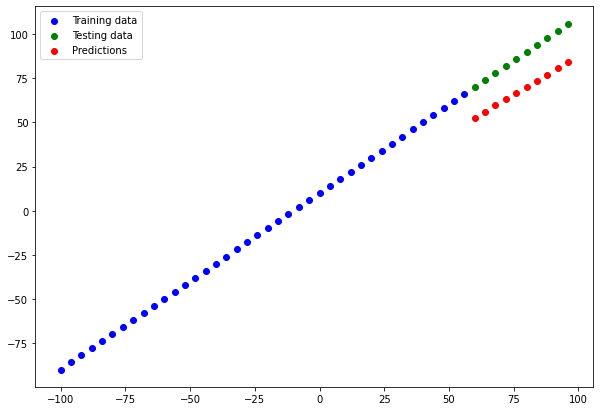

In [41]:
plot_predictions()

# evaluation our model's predictions with regression evaluation metrics

######## aquí he perdido mucho contenido que no se me ha guardado ########33

In [43]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

1/1 [==============================] - 0s 78ms/step


(8.595382, 80.37529)

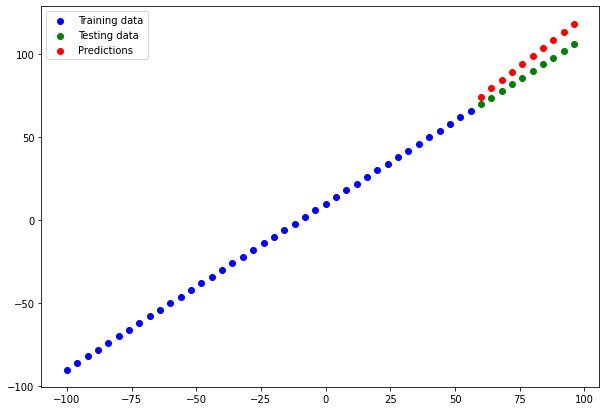

In [50]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(x_test)
plot_predictions(predictions=y_preds_1)

# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

In [51]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 64ms/step


(13.434563, 190.62466)

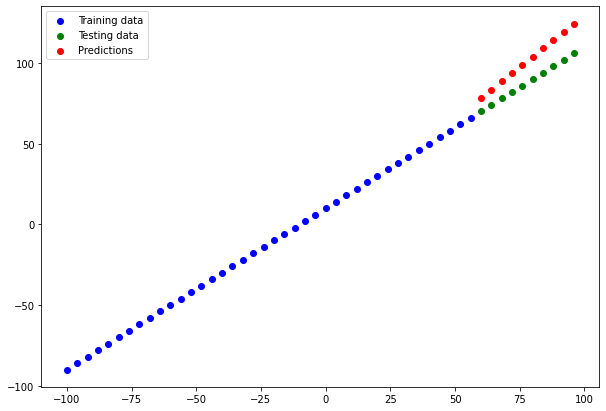

In [53]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(x_test)
plot_predictions(predictions=y_preds_2)

# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

In [54]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 54ms/step


(68.732086, 4810.425)

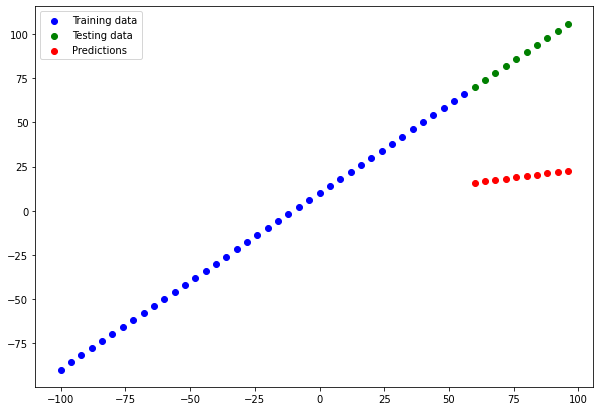

In [56]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(x_test)
plot_predictions(predictions=y_preds_3)

# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

In [62]:
# lets compare our models results using a pandas fatadrame
import pandas as pd

model_results = [['model_1', mae_1, mse_1],
                 ['model_2', mae_2, mse_2],
                 ['model_3', mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,8.595382,80.375290
1,model_2,13.434563,190.624664
2,model_3,68.732086,4810.424805


In [64]:
model_2.summary() 

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


One of the main goals should be to minimize the time between experiments. The more experiments you do, the more things you figure out which dont work and in turn, get closer to figuring out what does work. Remember the machine learning practioner motto:  "experiment, experiment, experiment"

## tracking your experiments

a really good habbit in ML is to track our experiments
Tools:
- TensorBoard - help to track modelling experiments
- Weights and Bioses - track all kind of ML experiments (plugs into tensorboard)

# Saving our models

saving our models allow us to use them outside Colab such as web or mobile app

1. SavedModel
2. HDF5

In [69]:
# Save model
model_2.save('best_model_SaveModel_format') # SavedModel

model_2.save('best_model_HDF5_format.h5') # HDF5

# check if save was done by loading our models



In [71]:
# load in the SavedModel format
loaded_SavedModel = tf.keras.models.load_model('/content/best_model_SaveModel_format')
loaded_SavedModel.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [74]:
# compare model_2 predictions with the model_2 loaded
model_2_preds = model_2.predict(x_test)
loaded_SavedModel_format_preds = loaded_SavedModel.predict(x_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 64ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [76]:
# load a model using .h5 format
loaded_h5_model = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# check predictions loaded and original model
model_2_preds = model_2.predict(x_test)
loaded_h5_model_preds = loaded_h5_model.predict(x_test)
model_2_preds == loaded_h5_model_preds

# download a model (or other file) from colab

1. you can go to "files", choose the file and download
2. use code (see cell below)
3. save it to google drive by coneecting it and copying

In [78]:
# download a file from colab
from google.colab import files
files.download('/content/best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
# conectar con drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [84]:
# save file to google drive
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/

# a larger example

In [85]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
# read data
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [91]:
# create a numerical encoding for our categorical variables (one hot encoding)
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [92]:
# create x and y values (features and labels)
x = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

# view x
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [93]:
# view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [94]:
# create training and test sets
from sklearn.model_selection import train_test_split


In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [ ]:
# build a nueral network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. create model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. fit model
insurance_model.fit(x_train, y_train, epochs=100)

In [ ]:
# check results with test data
insurance_model.evaluate(x_test, y_test)

lets try to improve our model 

In [114]:
# set random seed
tf.random.set_seed(42)

# 1. create model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile model
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3.fit model
insurance_model_2.fit(x_train, y_train, epochs=100, verbose=0)

In [108]:
# evaluate the larger model
insurance_model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4926.7036 - mae: 4926.7036


[4926.70361328125, 4926.70361328125]

In [117]:
# set random seed
tf.random.set_seed(42)

# 1. create model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile model
insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3.fit model
history = insurance_model_3.fit(x_train, y_train, epochs=200, verbose=0)

In [110]:
# evaluate the larger model
insurance_model_3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 10ms/step - loss: 3489.0083 - mae: 3489.0083


[3489.00830078125, 3489.00830078125]

Text(0.5, 0, 'epochs')

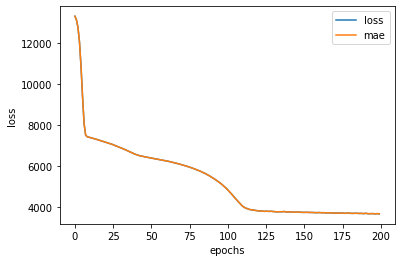

In [118]:
# plot history (training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

# how long should I train my model?

TensorFlow has a solution: EarlyStoppingCallback, a TF component you can add to your model to stop training once it stops improving certain metric

preprocessing data (normalization and standarization)

in terms of scaling values, neural networks tend to prefer normalization
if you are not sure on which to use, you could try both and see which performs better

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read data
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


to prepare our data, we can borrow a few classes from Scikit-Learn

In [124]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn values between 0 and 1 to normalize them
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# create x and y
x = insurance.drop('charges', axis=1)
y = insurance['charges']

# build our train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# fit the column transformer to our training data
ct.fit(x_train)
       
# transform training and test data with normalization (MinMaxScaler) and OneHotEnconder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [125]:
# what does our data look like?
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [126]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [128]:
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized, let's build a neural network model 

In [129]:
# set random seed
tf.random.set_seed(42)

# 1. create model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile model
insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3.fit model
history = insurance_model_4.fit(x_train_normal, y_train, epochs=100, verbose=0)

In [130]:
# evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3437.1328 - mae: 3437.1328


[3437.1328125, 3437.1328125]